In [1]:
!rm -rf InkubaLM-Challenge
!git clone https://github.com/melissafasol/InkubaLM-Challenge.git
%cd InkubaLM-Challenge


Cloning into 'InkubaLM-Challenge'...
remote: Enumerating objects: 374, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 374 (delta 146), reused 121 (delta 86), pack-reused 175 (from 1)
Receiving objects: 100% (374/374), 1.41 MiB | 15.90 MiB/s, done.
Resolving deltas: 100% (245/245), done.
/content/InkubaLM-Challenge


In [2]:
%cd InkubaLM-Challenge
!git pull


[Errno 2] No such file or directory: 'InkubaLM-Challenge'
/content/InkubaLM-Challenge
Already up to date.


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
!pip install -U trl bitsandbytes
!pip install datasets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 336.4/336.4 kB 7.1 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 76.1/76.1 MB 10.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 491.2/491.2 kB 37.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 5.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 72.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 59.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [8]:
import sys
sys.path.append("..")  # Add parent directory to the path

import os
from typing import List
from pathlib import Path
import numpy as np

# DO NOT EDIT
# create submission file
import pandas as pd
from huggingface_hub import login
from transformers import (
    AutoTokenizer,
)
from utils import (
    eval,
    model_function,
    multitask,
    supplement,
    ab_testing
    )

import torch
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig
from peft import LoraConfig, get_peft_model, PeftModel
from datasets import load_dataset, concatenate_datasets, Dataset, Value
from trl import SFTConfig, SFTTrainer, DataCollatorForCompletionOnlyLM
from peft import PeftModel

import shap

def build_prompt(example):
    return f"{example['instruction']}\n{example['inputs']}\nAnswer:"

def log_likelihood_score(prompt, label):
    full_input = prompt + " " + label
    input_ids = tokenizer(full_input, return_tensors="pt").input_ids.to("cuda")
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss
    return -loss.item()


def predict_fn(prompt_list):
    all_scores = []
    for prompt in prompt_list:
        scores = [log_likelihood_score(prompt, " " + label) for label in labels]
        probs = torch.nn.functional.softmax(torch.tensor(scores), dim=0)
        all_scores.append(probs.numpy())
    return all_scores

In [9]:
from google.colab import drive
drive.mount('/content/drive')
output_path = "/content/drive/MyDrive/InkubaLM-Challenge/Output"
os.makedirs(output_path, exist_ok=True)

Mounted at /content/drive


In [10]:
#os.environ["TOKENIZERS_PARALLELISM"] = "false"

from huggingface_hub import login

try:
    from google.colab import userdata

    # Note: `userdata.get` is a Colab API. If you're not using Colab, set the env
    # vars as appropriate for your system.
    # userdata.get("HF_TOKEN") indicates that the name of the token in the Colab env is HF_TOKEN
    os.environ["hf_token_2"] = userdata.get("hf_token_2")
except:
    os.environ["hf_token_2"] = "----"

login(token=os.environ["hf_token_2"])

token = os.environ["hf_token_2"]
if token == "----":
    print("‚ö†Ô∏è Warning: No Hugging Face token found. Some models may not load.")
else:
    login(token=token)

In [11]:
import pickle
import os

# Define the directory path
save_dir = "/content/drive/MyDrive/InkubaLM/outputs"

# Define file paths
explainer_path = os.path.join(save_dir, "explainer.pkl")
shap_values_path = os.path.join(save_dir, "shap_values.pkl")

# Check file sizes (should be > 0)
print("Explainer file size:", os.path.getsize(explainer_path))
print("SHAP values file size:", os.path.getsize(shap_values_path))

# Try loading the files
try:
    with open(explainer_path, "rb") as f:
        loaded_explainer = pickle.load(f)
    print("‚úÖ Explainer loaded successfully.")
except Exception as e:
    print("‚ùå Error loading explainer:", e)

try:
    with open(shap_values_path, "rb") as f:
        loaded_shap_values = pickle.load(f)
    print("‚úÖ SHAP values loaded successfully.")
except Exception as e:
    print("‚ùå Error loading SHAP values:", e)


Explainer file size: 4356091
SHAP values file size: 5759468
‚úÖ Explainer loaded successfully.
‚úÖ SHAP values loaded successfully.


In [12]:
type(loaded_shap_values)

shap._explanation.Explanation

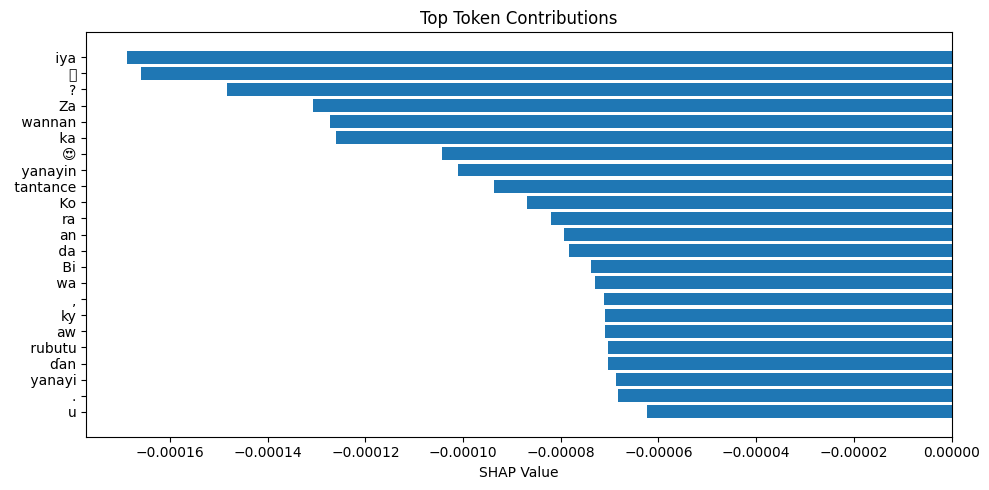

In [14]:
import matplotlib.pyplot as plt

# Pick example
example = loaded_shap_values[0]

# Extract tokens and SHAP values
tokens = example.data
shap_vals = example.values

# If multi-output (e.g., XNLI), select just one class
if isinstance(shap_vals[0], (list, np.ndarray)):
    shap_vals = [v[0] for v in shap_vals]  # or change index as needed

# Convert to pandas for easier sorting
import pandas as pd
df = pd.DataFrame({
    "token": tokens,
    "shap_value": shap_vals
})

# Sort by absolute contribution
df = df.reindex(df["shap_value"].abs().sort_values(ascending=False).index)

# Plot top 15 contributors
plt.figure(figsize=(10, 5))
plt.barh(df["token"][:30], df["shap_value"][:30])
plt.gca().invert_yaxis()
plt.xlabel("SHAP Value")
plt.title("Top Token Contributions")
plt.tight_layout()
plt.show()


In [15]:
print("# Loading datasets")
se_dataset, mt_dataset,xn_dataset = multitask.load_and_combine_datasets("Train")
test_dataset = multitask.load_and_combine_datasets("Test")


test_dataset_list = list(test_dataset)
combined_test_dataset = concatenate_datasets(test_dataset_list)


# Loading datasets


README.md:   0%|          | 0.00/485 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/39.0k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/400 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/485 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/72.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/600 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/447 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/400 [00:00<?, ? examples/s]

All Columns: ['premise', 'targets', 'task', 'instruction', 'data_source', 'langs', 'ID', 'inputs']


Casting the dataset:   0%|          | 0/400 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/600 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/400 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/486 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/33.1k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/300 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/484 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/22.4k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/300 [00:00<?, ? examples/s]

README.md:   0%|          | 0.00/447 [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/28.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/300 [00:00<?, ? examples/s]

All Columns: ['premise', 'targets', 'task', 'instruction', 'data_source', 'langs', 'ID', 'inputs']


Casting the dataset:   0%|          | 0/300 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/300 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/300 [00:00<?, ? examples/s]

## Load Base Model and Fine-Tuned QLoRA model

## Base Model:

In [20]:
model_name = "lelapa/InkubaLM-0.4B"
model, tokenizer, bnb_config = multitask.setup_model_and_tokenizer(model_name, token=token,use_4bit=False)

config.json:   0%|          | 0.00/763 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.66G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/960 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/991k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.95M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/414 [00:00<?, ?B/s]

In [21]:
prompt = "Translate to Swahili: I love science."

inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
outputs = model.generate(**inputs, max_new_tokens=20)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Translate to Swahili: I love science. Translate to Swahili: I love science. Translate to Swahili: I love science.


### QLoRA Model

In [22]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model = AutoModelForCausalLM.from_pretrained("melissafasol/Inkuba_QLoRA", device_map="auto")
tokenizer = AutoTokenizer.from_pretrained("melissafasol/Inkuba_QLoRA")



In [19]:
prompt = "Translate to Swahili: I love science."

inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
outputs = model.generate(**inputs, max_new_tokens=20)

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

Setting `pad_token_id` to `eos_token_id`:2 for open-end generation.


Translate to Swahili: I love science. | Apg29 Translate to Swahili: I love science. | Apg29 Trans


### Code to implement SHAP analysis on base model

In [29]:
#Separate by language
se_df = pd.DataFrame(se_dataset)
xn_df = pd.DataFrame(xn_dataset)



In [36]:
swa_se = se_df.loc[se_df['langs'] == 'swahili']
hau_se = se_df.loc[se_df['langs'] == 'hausa']
swa_xn = se_df.loc[xn_df['langs'] == 'swahili']
hau_xn = se_df.loc[xn_df['langs'] == 'hausa']

swa_se_dset = Dataset.from_pandas(swa_se)
hau_se_dset = Dataset.from_pandas(hau_se)
swa_xn_dset = Dataset.from_pandas(swa_xn)
hau_xn_dset = Dataset.from_pandas(hau_xn)

In [37]:
labels = swa_se_dset['targets']
sample_data = swa_se_dset.select(range(3))
sample_prompts = [build_prompt(example) for example in sample_data]

In [38]:
model.to("cuda")

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(61788, 2048)
    (layers): ModuleList(
      (0-7): 8 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (v_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (up_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (down_proj): Linear(in_features=5632, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((2048,), eps=1e-05)
    (rotary_emb): 

In [39]:
def build_prompt(example):
    return f"{example['instruction']}\n{example['inputs']}\nAnswer:"

def log_likelihood_score(prompt, label):
    full_input = prompt + " " + label
    input_ids = tokenizer(full_input, return_tensors="pt").input_ids.to("cuda")
    with torch.no_grad():
        outputs = model(input_ids, labels=input_ids)
        loss = outputs.loss
    return -loss.item()


def predict_fn(prompt_list):
    all_scores = []
    for prompt in prompt_list:
        scores = [log_likelihood_score(prompt, " " + label) for label in labels]
        probs = torch.nn.functional.softmax(torch.tensor(scores), dim=0)
        all_scores.append(probs.numpy())
    return all_scores


In [40]:
explainer = shap.Explainer(predict_fn, tokenizer, algorithm = "partition")
shap_values = explainer(sample_prompts)

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [1:20:22<00:00, 1197.75s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [2:00:18, 2406.31s/it]


In [41]:
import os
import pickle

# Define save path
save_dir = "/content/drive/MyDrive/InkubaLM/outputs/swahili_sentiment"
os.makedirs(save_dir, exist_ok=True)

# Recreate explainer and generate SHAP values
explainer = shap.Explainer(predict_fn, tokenizer, algorithm="partition")
shap_values = explainer(sample_prompts)

# Save explainer
with open(os.path.join(save_dir, "explainer.pkl"), "wb") as f:
    pickle.dump(explainer, f)

# Save shap values
with open(os.path.join(save_dir, "shap_values.pkl"), "wb") as f:
    pickle.dump(shap_values, f)

print("‚úÖ SHAP values and explainer saved successfully.")


  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [1:20:22<00:00, 1195.53s/it]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 4it [2:00:13, 2404.37s/it]

‚úÖ SHAP values and explainer saved successfully.


In [42]:
labels = hau_se_dset ['targets']
sample_data = hau_se_dset.select(range(3))
sample_prompts = [build_prompt(example) for example in sample_data]

In [43]:
explainer = shap.Explainer(predict_fn, tokenizer, algorithm = "partition")
shap_values = explainer(sample_prompts)

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer:  33%|‚ñà‚ñà‚ñà‚ñé      | 1/3 [00:00<?, ?it/s]

  0%|          | 0/498 [00:00<?, ?it/s]

PartitionExplainer explainer: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 3/3 [1:18:00<00:00, 2340.44s/it]


KeyboardInterrupt: 

In [ ]:
# Define save path
save_dir = "/content/drive/MyDrive/InkubaLM/outputs/hausa_sentiment"
os.makedirs(save_dir, exist_ok=True)

# Save explainer
with open(os.path.join(save_dir, "explainer.pkl"), "wb") as f:
    pickle.dump(explainer, f)

# Save shap values
with open(os.path.join(save_dir, "shap_values.pkl"), "wb") as f:
    pickle.dump(shap_values, f)

print("‚úÖ SHAP values and explainer saved successfully.")


In [ ]:
# Plot SHAP for one example
shap.plots.text(shap_values[0])

In [ ]:
import os

adapter_path = "/content/drive/MyDrive/InkubaLM/outputs/sft_model/balanced/lora_adapter_v4"
print(os.listdir(adapter_path))


['config.json', 'generation_config.json', 'tokenizer_config.json', 'special_tokens_map.json', 'tokenizer.model', 'tokenizer.json']


In [ ]:
tokenizer = AutoTokenizer.from_pretrained(
    "/content/drive/MyDrive/InkubaLM/outputs/lora_checkpoint"
)
tokenizer.pad_token = tokenizer.eos_token  # Important for generation

# 2. Load LoRA adapter on top of base model
model = PeftModel.from_pretrained(
    base_model,
    "/content/drive/MyDrive/InkubaLM/outputs/lora_checkpoint"
)

model.eval()

In [25]:
print("# Loading datasets")
train_dataset = multitask.load_and_combine_datasets("Train")
test_dataset = multitask.load_and_combine_datasets("Test")

print("\n# Example from training dataset:")
print(train_dataset[0])

print("\n# Example from test dataset:")
print(test_dataset[0])

# Loading datasets
All Columns: ['premise', 'targets', 'task', 'instruction', 'data_source', 'langs', 'ID', 'inputs']
All Columns: ['premise', 'targets', 'task', 'instruction', 'data_source', 'langs', 'ID', 'inputs']

# Example from training dataset:
Dataset({
    features: ['ID', 'task', 'langs', 'data_source', 'instruction', 'inputs', 'targets', 'premise'],
    num_rows: 400
})

# Example from test dataset:
Dataset({
    features: ['ID', 'task', 'langs', 'data_source', 'instruction', 'inputs', 'targets', 'premise'],
    num_rows: 300
})


In [26]:
model.eval()

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(61788, 2048)
    (layers): ModuleList(
      (0-7): 8 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (k_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (v_proj): Linear(in_features=2048, out_features=2048, bias=False)
          (o_proj): Linear(in_features=2048, out_features=2048, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (up_proj): Linear(in_features=2048, out_features=5632, bias=False)
          (down_proj): Linear(in_features=5632, out_features=2048, bias=False)
          (act_fn): SiLU()
        )
        (input_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((2048,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((2048,), eps=1e-05)
    (rotary_emb): 

## Evaluate the Current Model

Run inference analysis on the test set to measure how well the model generalises on unseen data:

In [27]:
results_df = multitask.apply_inference_to_test_data(model, tokenizer, test_dataset)
results_df.to_csv("submission_balanced_qlora.csv", index=False)


Generating Responses:   0%|          | 0/3 [00:00<?, ?it/s]

KeyError: 'premise'

In [ ]:
results_df.head()

ID    langs  \
0    ID_f3c74c7b_sentiment_test__hausa    hausa   
1    ID_aad19dbf_sentiment_test__hausa    hausa   
2    ID_f6de0381_sentiment_test__hausa    hausa   
3  ID_cbec84fe_sentiment_test__swahili  swahili   
4    ID_885caf5c_sentiment_test__hausa    hausa   

                                         instruction  \
0  Gano ra'ayin da aka bayyana a cikin wannan rub...   
1  Za ka iya tantance yanayin wannan rubutu? Bi w...   
2  Za ka iya tantance yanayin wannan rubutu? Bi w...   
3  Changanua mawazo ya matini yanayofuata na uain...   
4  Tantance ra‚Äôayin wannan rubutu kuma a rarraba ...   

                                              inputs targets  \
0  @user ynxu fha da kanada kudi shikenan duk kay...    None   
1  @user alhamdulillah babu abinda zamuce sai god...    None   
2     @user ke ina ruwan ki üò¨ ba harkar film bane ba    None   
3  matokeo chanya liverais magufuli katika uzindu...    None   
4            @user ü§£ akwai lauje cikin nadi gaskiya.    None   

                                           generated Response  
0  Kyakkyawan Hoto na Hoto na Hoto na Hoto na Hot...        0  
1  Korau Kasashen Duniya Da Kasashen Duniya Da Ka...        2  
2  Korau: idan rubutu na nuna kyakkyawar magana k...        0  
3  Wastani Wastani Wastani Wastani Wastani Wastan...        1  
4           Korau Korau Korau Korau Korau Korau Kora        2

**The response column shows raw generated outputs that:**
- mix classification, translation and nonsense
- often repeat words
- sometimes echoes the prompt

**1. Identify Task Type from ID**

In [28]:
def get_task_type(row):
    if "sentiment" in row["ID"]:
        return "sentiment"
    elif "xnli" in row["ID"]:
        return "nli"
    elif "mt" in row["ID"]:
        return "mt"
    else:
        return "unknown"

results_df["task"] = results_df.apply(get_task_type, axis=1)


NameError: name 'results_df' is not defined

In [ ]:
results_df

ID    langs  \
0      ID_f3c74c7b_sentiment_test__hausa    hausa   
1      ID_aad19dbf_sentiment_test__hausa    hausa   
2      ID_f6de0381_sentiment_test__hausa    hausa   
3    ID_cbec84fe_sentiment_test__swahili  swahili   
4      ID_885caf5c_sentiment_test__hausa    hausa   
..                                   ...      ...   
895       ID_88cd08fe_test__afrixnli_hau      hau   
896       ID_404bc9af_test__afrixnli_swa      swa   
897       ID_a399ed32_test__afrixnli_swa      swa   
898       ID_9f28a032_test__afrixnli_hau      hau   
899       ID_31eb3181_test__afrixnli_swa      swa   

                                           instruction  \
0    Gano ra'ayin da aka bayyana a cikin wannan rub...   
1    Za ka iya tantance yanayin wannan rubutu? Bi w...   
2    Za ka iya tantance yanayin wannan rubutu? Bi w...   
3    Changanua mawazo ya matini yanayofuata na uain...   
4    Tantance ra‚Äôayin wannan rubutu kuma a rarraba ...   
..                                                 ...   
895  Is the following question True, False or Neither?   
896  Is the following question True, False or Neither?   
897  Is the following question True, False or Neither?   
898  Is the following question True, False or Neither?   
899  Is the following question True, False or Neither?   

                                                inputs targets  \
0    @user ynxu fha da kanada kudi shikenan duk kay...    None   
1    @user alhamdulillah babu abinda zamuce sai god...    None   
2       @user ke ina ruwan ki üò¨ ba harkar film bane ba    None   
3    matokeo chanya liverais magufuli katika uzindu...    None   
4              @user ü§£ akwai lauje cikin nadi gaskiya.    None   
..                                                 ...     ...   
895                     Bradley ya fito daga Missouri.    None   
896            Brahma ni sehemu muhimu zaidi ya utatu.    None   
897  Ilinichukua muda wa miezi 13 kukiweka kichemsh...    None   
898  an hada da nazarin Marxist-Leninist a harkar k...    None   
899            Kikundi cha msingi ni zaidi ya gharama.    None   

                                             generated Response       task  
0    Kyakkyawan Hoto na Hoto na Hoto na Hoto na Hot...        0  sentiment  
1    Korau Kasashen Duniya Da Kasashen Duniya Da Ka...        2  sentiment  
2    Korau: idan rubutu na nuna kyakkyawar magana k...        0  sentiment  
3    Wastani Wastani Wastani Wastani Wastani Wastan...        1  sentiment  
4             Korau Korau Korau Korau Korau Korau Kora        2  sentiment  
..                                                 ...      ...        ...  
895            0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0        0        nli  
896            0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0        0        nli  
897            0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0        0        nli  
898            1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1        1        nli  
899            0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0        0        nli  

[900 rows x 8 columns]

**2. Plot lengths of generated outputs**
- repetitive translations
- long hallucinated outputs
- tasks with very short generations (like sentiment)

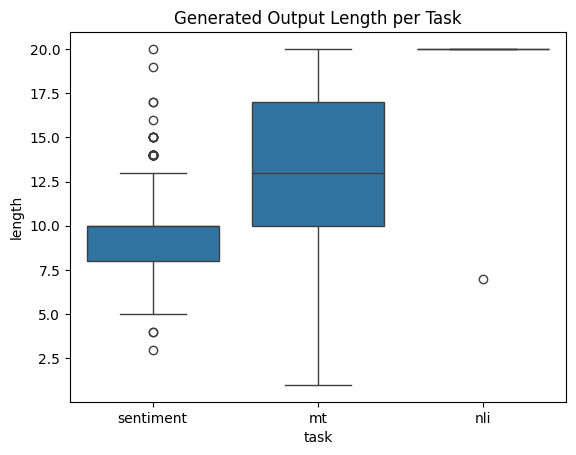

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

results_df["length"] = results_df["generated"].str.split().apply(len)

sns.boxplot(data=results_df, x="task", y="length")
plt.title("Generated Output Length per Task")
plt.show()



**3. Check for repetitive or low-quality outputs**
- model instability or overtraining

In [ ]:
repetitive = results_df[results_df["generated"].str.contains(r"\b(\w+)( \1\b){3,}", regex=True, na=False)]
print(f"Repetitive outputs: {len(repetitive)} / {len(results_df)}")



Repetitive outputs: 583 / 900


In [ ]:
repetitive[["task", "inputs", "generated"]].sample(5)


task                                             inputs  \
279  sentiment  @user allah ya kiyaye wannan ba fata bane....üòí...   
880        nli                       rukunin tushe yafi farashin.   
297  sentiment  erikali imesema imedhamiria kuwanufaisha wanan...   
44   sentiment  tafadhali tuandikie namba yako ya kadi kwa msa...   
705        nli  ta karfaffafen tsarin kula da lafiyar maaikata...   

                                             generated  
279           Korau Korau Korau Korau Korau Korau Kora  
880            0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
297  Wastani Wastani Wastani Wastani Wastani Wastan...  
44   Wastani Wastani Wastani Wastani Wastani Wastan...  
705            1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

**4. Visualise Word Frequencies (Word Cloud)**

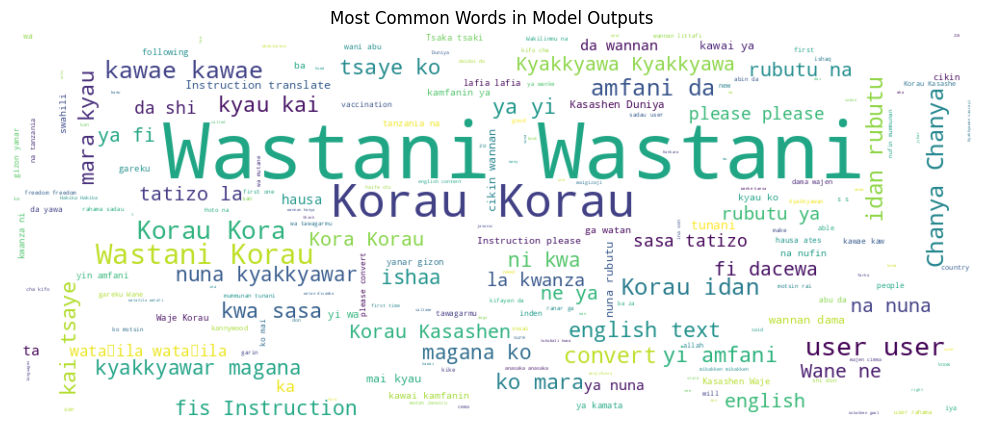

In [ ]:
from wordcloud import WordCloud

text = " ".join(results_df["generated"].dropna())
wordcloud = WordCloud(width=1000, height=400, background_color="white").generate(text)

plt.figure(figsize=(15, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Model Outputs")
plt.show()



In [ ]:
results_df["generated"].sample(10).tolist()



['Wastani Wastani Wastani Wastani Wastani Wastani Wastani Wastani Wastani Wastani',
 '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0',
 'Korau Korau Korau Korau Korau Korau Kora',
 '1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2',
 '1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1',
 'Wastani Wastani Wastani Wastani Wastani Wastani Wastani Wastani Wastani Wastani',
 'Korau: idan ba a yi wa kowa adalci ba, to a yi wa kowa adalci.',
 'Wastani Wastani Wastani Wastani Wastani Wastani Wastani Wastani Wastani Wastani',
 'Wastani Wastani Wastani Wastani Wastani Wastani Wastani Wastani Wastani Wastani',
 '0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0']

**5. Instruction echo detection**
- prompt leakage/confusion


In [ ]:
echoed_instructions = results_df[results_df["generated"].str.contains("Instruction", na=False)]
echoed_instructions[["task", "inputs", "generated"]].sample(5)



task                                             inputs  \
592   mt                           i voted on the first day   
301   mt                                      i agreed to."   
349   mt  when all human beings are good, there is no bl...   
492   mt                          before the war yesterday.   
378   mt  the fact that a person has held office as gove...   

                                             generated  
592  i voted on the first dayevansiagawa. ### Instr...  
301  i agreed to."ishaq(r)nasiha.fis Instruction: t...  
349  Wane ne ya fi dacewa a gareku?fis Instruction:...  
492  Wane ne ya fi dacewa a cikin wannan littafi?fi...  
378  anyone who is not a good news?fis Instruction:...